In [1]:
from scipy.io import netcdf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import geopandas as gpd
import pandas as pd

## Elevation

In [5]:
gdf = gpd.read_file('china_city.geojson')

In [6]:
gdf['adm1'].unique()

array(['beijingshi', 'tianjinshi', 'hebeisheng', 'shanxisheng',
       'neimengguzizhiqu', 'liaoningsheng', 'jilinsheng',
       'heilongjiangsheng', 'shanghaishi', 'jiangsusheng',
       'zhejiangsheng', 'anhuisheng', 'fujiansheng', 'jiangxisheng',
       'shandongsheng', 'henansheng', 'hubeisheng', 'hunansheng',
       'guangdongsheng', 'guangxizhuangzuzizhiqu', 'hainansheng',
       'chongqingshi', 'sichuansheng', 'guizhousheng', 'yunnansheng',
       'xizangzizhiqu', 'shaanxisheng', 'gansusheng', 'qinghaisheng',
       'ningxiahuizuzizhiqu', 'xinjiangweiwuerzizhiqu', 'taiwansheng',
       'xianggangtebiexingzhengqu', 'aomentebiexingzhengqu'], dtype=object)

In [11]:
import geopandas as gpd
from rasterstats import zonal_stats

In [13]:
values = "social_physical_var_dataset/World_ELE_GISdata_GlobalSolarAtlas-v2_GEOTIFF/ELE.tif"


stats = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["mean"]))
gdf = gdf.join(stats)


/opt/anaconda3/lib/python3.12/site-packages/rasterstats/io.py:335: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


In [15]:
gdf.rename(columns = {'mean':'mean_elev'}, inplace=True)

Text(0.5, 1.0, 'Average elevation (m) in China districts')

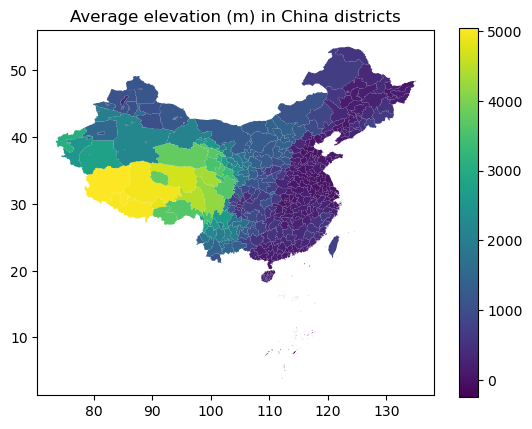

In [17]:
gdf.plot(column='mean_elev', legend=True )
plt.title("Average elevation (m) in China districts")

In [19]:
gdf['location'] = gdf['adm2'] + ', ' + gdf['adm1']

In [21]:
gdf

,province,city,adm1,adm2,geometry,mean_elev,location
0,北京市,北京市,beijingshi,beijingshi,"MULTIPOLYGON (((116.66689 40.97671, 116.68126 ...",368.903920,"beijingshi, beijingshi"
1,天津市,天津市,tianjinshi,tianjinshi,"MULTIPOLYGON (((117.46737 40.23886, 117.49701 ...",16.372675,"tianjinshi, tianjinshi"
2,河北省,石家庄市,hebeisheng,shijiazhuangshi,"MULTIPOLYGON (((113.83088 38.74802, 113.83905 ...",257.793410,"shijiazhuangshi, hebeisheng"
3,河北省,唐山市,hebeisheng,tangshanshi,"MULTIPOLYGON (((118.61425 39.00000, 118.59575 ...",62.082261,"tangshanshi, hebeisheng"
4,河北省,秦皇岛市,hebeisheng,qinhuangdaoshi,"MULTIPOLYGON (((119.14956 40.60191, 119.15490 ...",234.221630,"qinhuangdaoshi, hebeisheng"
...,...,...,...,...,...,...,...
370,新疆维吾尔自治区,新星市,xinjiangweiwuerzizhiqu,xinxingshi,"MULTIPOLYGON (((95.57302 41.99986, 95.51550 41...",1625.722497,"xinxingshi, xinjiangweiwuerzizhiqu"
371,新疆维吾尔自治区,白杨市,xinjiangweiwuerzizhiqu,baiyangshi,"MULTIPOLYGON (((82.78747 46.68111, 82.82672 46...",548.041420,"baiyangshi, xinjiangweiwuerzizhiqu"
372,台湾省,台湾省,taiwansheng,taiwansheng,"MULTIPOLYGON (((121.60056 22.02062, 121.59325 ...",771.775576,"taiwansheng, taiwansheng"
373,香港特别行政区,香港特别行政区,xianggangtebiexingzhengqu,xianggangtebiexingzhengqu,"MULTIPOLYGON (((114.27453 22.16333, 114.25354 ...",125.780292,"xianggangtebiexingzhengqu, xianggangtebiexingz..."


## Coastal

In [24]:
coast = gpd.read_file('social_physical_var_dataset/china_city_coastal.geojson')

In [26]:
coast['location'] = coast['adm2'] + ', ' + coast['adm1']

In [28]:
gdf['coast'] = [1 if x in coast['location'].unique() else 0 for x in gdf['location']]

<Axes: >

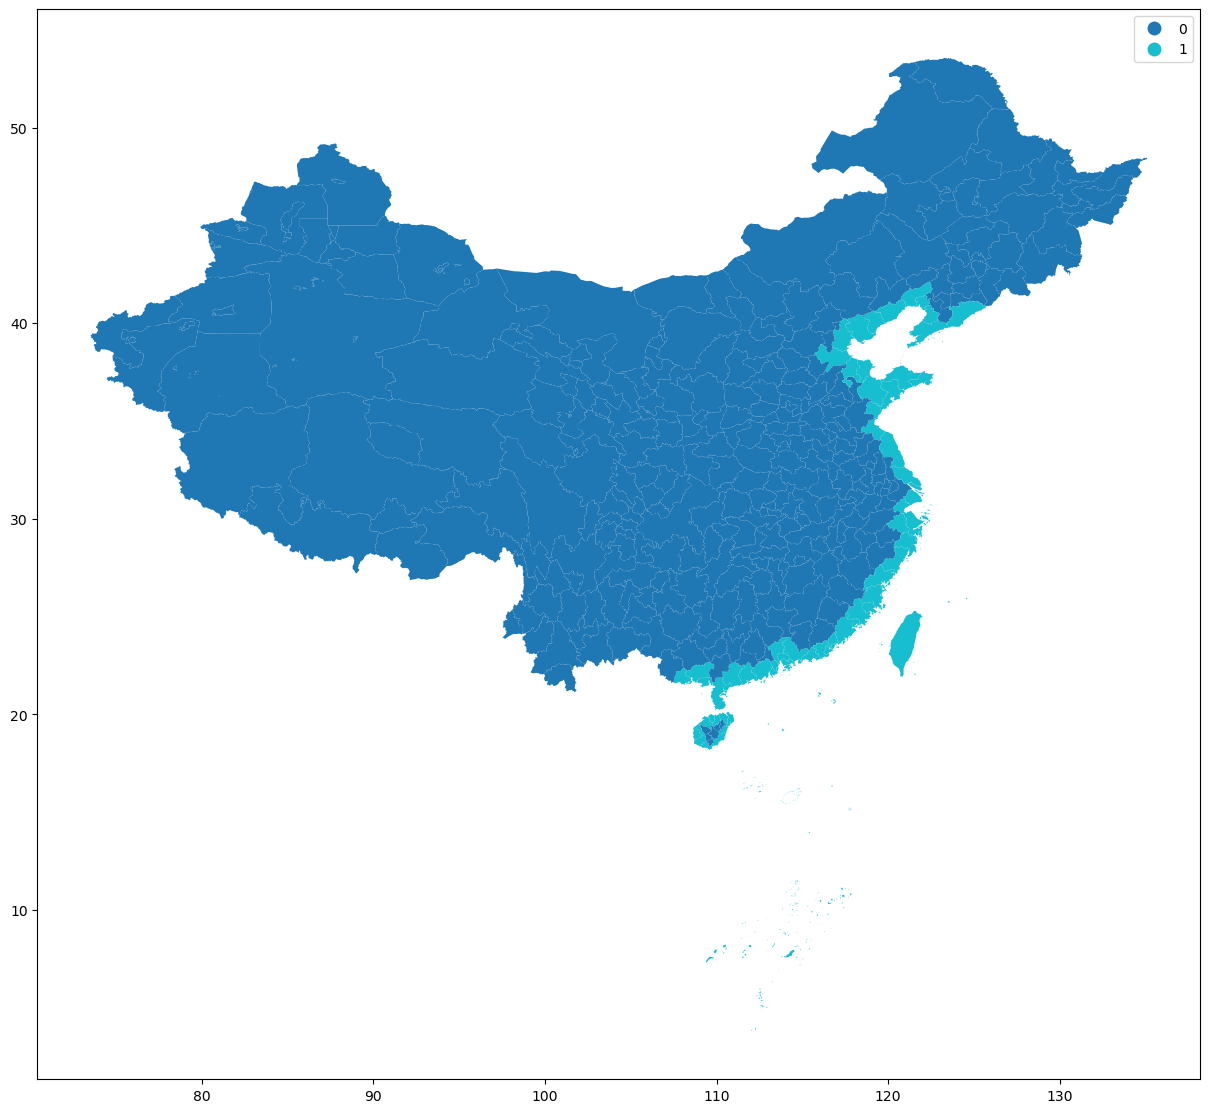

In [30]:
gdf.plot(column='coast', categorical= True, legend=True,figsize=(15,15))

## Human Development Index

In [33]:
import pandas as pd

In [35]:
hdi = pd.read_excel('social_physical_var_dataset/hdi_index.xlsx')

In [37]:
gdf = gdf.merge(hdi[['adm1', 'HDI']],on='adm1',how='left')

In [39]:
gdf.dropna(inplace=True)

Text(0.5, 1.0, 'Provincial HDI China')

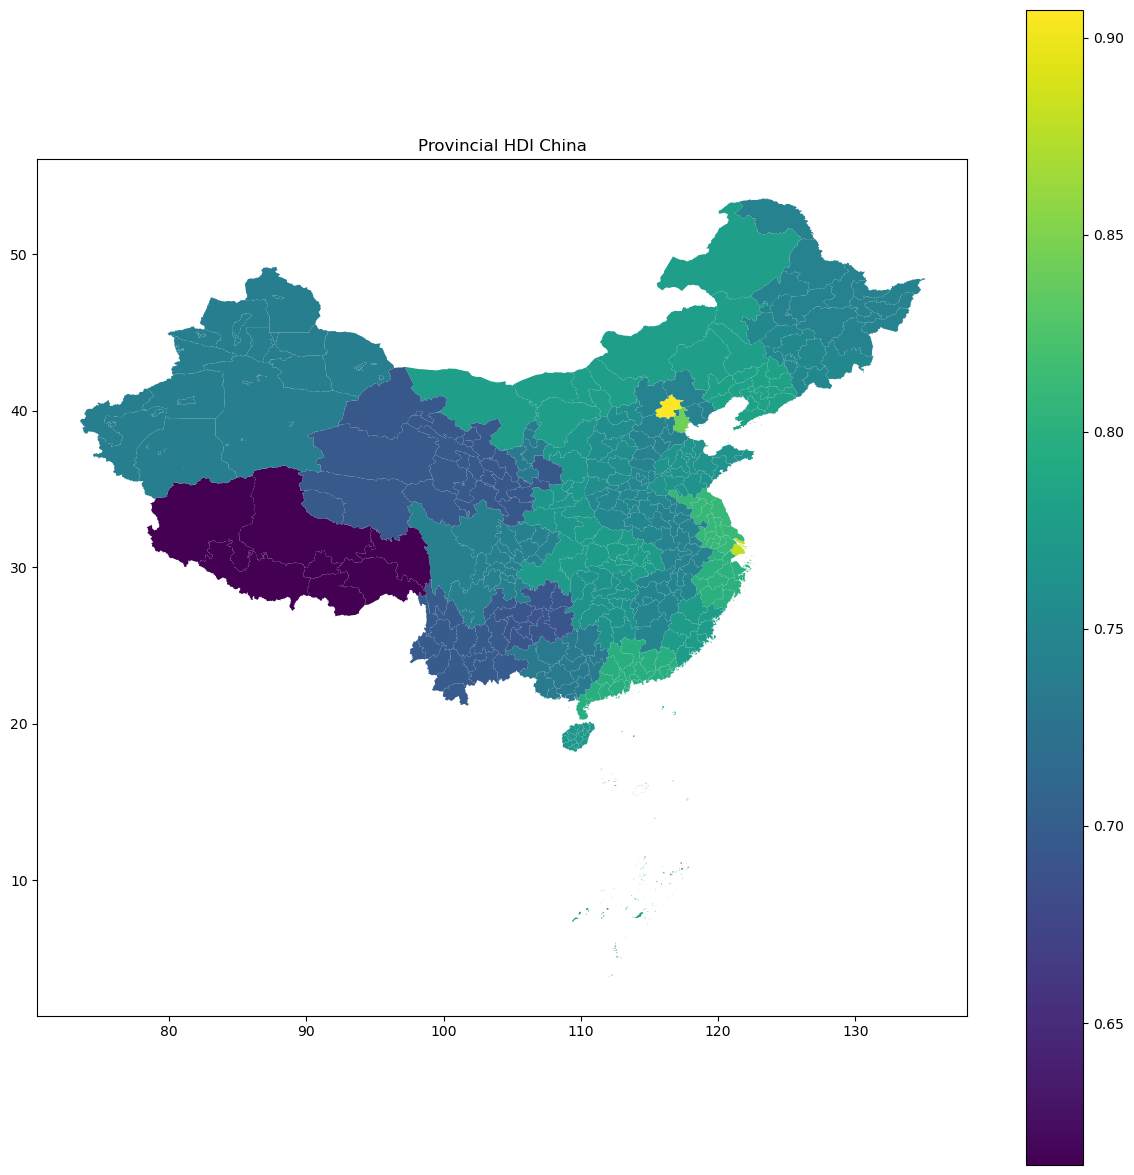

In [41]:
gdf.plot(column='HDI', legend=True,figsize=(15,15))
plt.title('Provincial HDI China')

## Population density

In [44]:
#https://hub.worldpop.org/geodata/summary?id=44834

values = "social_physical_var_dataset/chn_pd_2020_1km_UNadj.tif"

stats = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["min", "max", "mean"]))
gdf = gdf.join(stats)


In [45]:
gdf.rename(columns={'mean':'popdens'}, inplace=True)

In [46]:
gdf = gdf[['adm1', 'adm2', 'geometry', 'mean_elev', 'location', 'coast', 'HDI', 'popdens']]

Text(0.5, 1.0, 'Pop Den China')

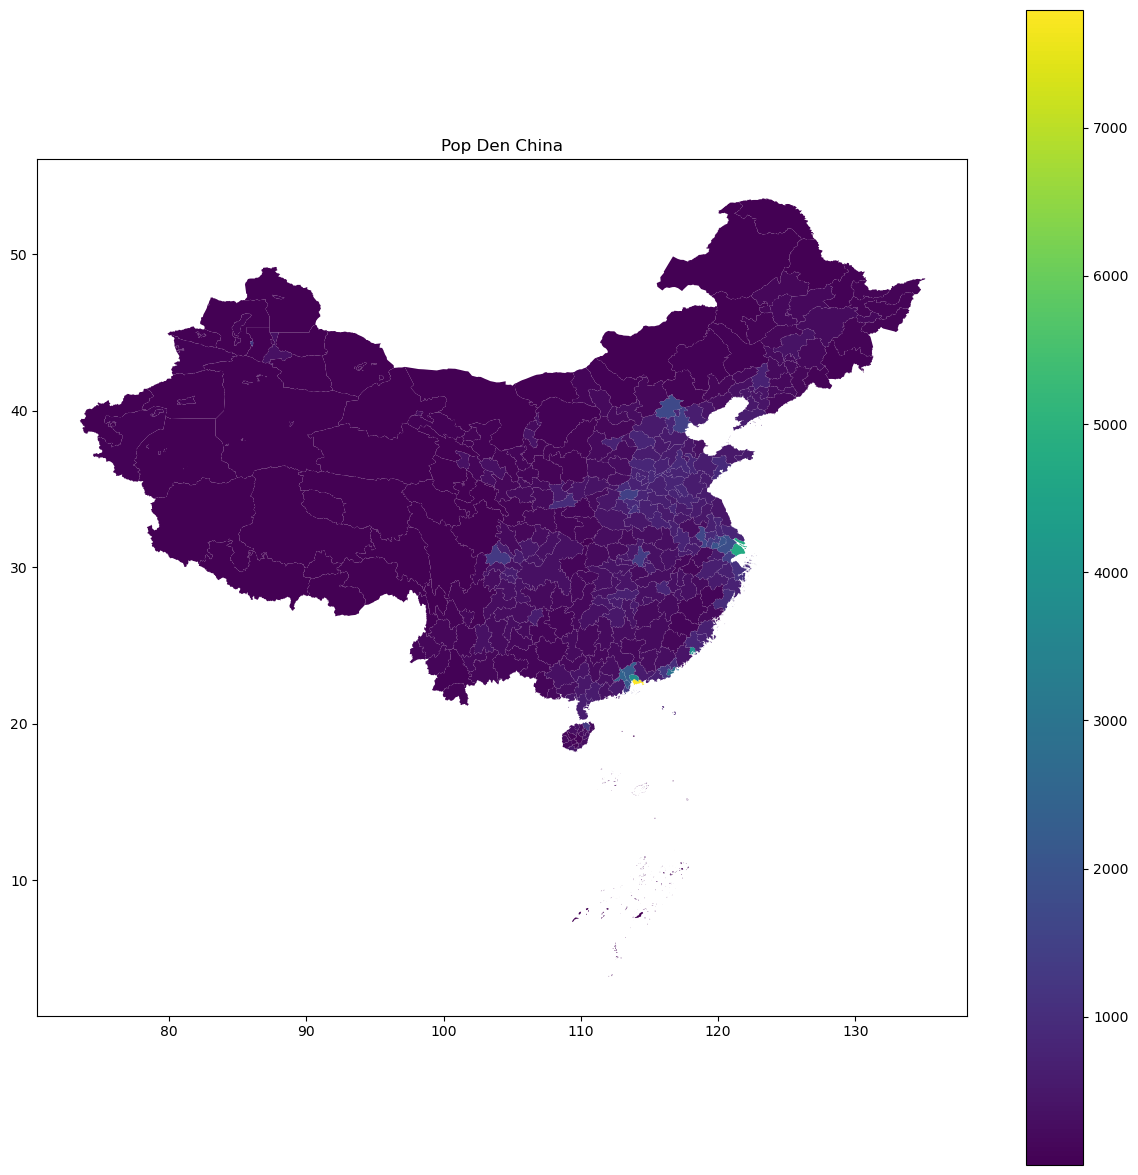

In [49]:
gdf.plot(column='popdens', legend=True,figsize=(15,15))
plt.title('Pop Den China')

In [51]:
import glob

## Age

In [55]:
# sum all population totals above 60+

gdf['over60_pop'] = 0
for file in glob.glob('social_physical_var_dataset/age/*'):
    
    values = file
    
    pop_total = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["sum"]))
    gdf['over60_pop'] += pop_total['sum']


KeyboardInterrupt



In [ ]:
# divide 60+ age by total population to get population proportion above 60
for file in glob.glob('social_physical_var_dataset/pop/*'):
    
    values = file
    
    pop_sum = gpd.GeoDataFrame(zonal_stats(gdf, values, stats=["sum"]))
    gdf['pop_total'] = pop_sum['sum']

In [ ]:
gdf['over60_propor'] = gdf['over60_pop'] / gdf['pop_total']

In [ ]:
gdf.plot(column='over60_propor', legend=True)
plt.title("Age 60+ population proportion")

In [ ]:
HDI_subset = gdf.drop_duplicates('HDI')

In [ ]:
deciles = pd.qcut(HDI_subset['HDI'], 10, labels= range(1,11)).astype(int)
HDI_subset['HDI_dec'] = deciles
gdf = gdf.merge(HDI_subset[['HDI', 'HDI_dec']], on='HDI')


gdf['popdens_dec'] = pd.qcut(gdf['popdens'], 10, labels= range(1,11)).astype(int)
gdf['over60_dec'] = pd.qcut(gdf['over60_propor'], 10, labels= range(1,11)).astype(int)

In [79]:
gdf.drop(columns='geometry').to_csv('social_and_physical_variables.csv')